In [1]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
##Reading data
students = pd.read_excel('Student_performance1.xlsx')
students.head(10)
students.isna().sum()

Access_no     0
gender       28
age          31
course        0
DSC3108       8
DSC3114      17
MTH3108      17
SYE3104      14
dtype: int64

In [7]:
students['gender'] = students['gender'].fillna(students['gender'].mode()[0])
students.isna().sum()

Access_no     0
gender        0
age          31
course        0
DSC3108       8
DSC3114      17
MTH3108      17
SYE3104      14
dtype: int64

In [31]:
##visualizing the data
num_data = students.select_dtypes(exclude='object')
num_data

,age,DSC3108,DSC3114,MTH3108,SYE3104
0,21.0,1000.0,88.0,NaN,94.0
1,35.0,71.0,77.0,90.0,76.0
2,22.0,90.0,83.0,80.0,NaN
3,32.0,83.0,80.0,77.0,97.0
4,27.0,79.0,83.0,64.0,58.0
...,...,...,...,...,...
295,35.0,94.0,53.0,96.0,59.0
296,NaN,NaN,52.0,63.0,100.0
297,40.0,66.0,95.0,78.0,94.0
298,36.0,67.0,71.0,86.0,66.0


In [56]:
def visual(data):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(data.columns):
        if data[col].dtype in ['float64','int64']:
            plt.subplot(4,4, i+1)
            sns.histplot(data[col])
            plt.title(col)
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

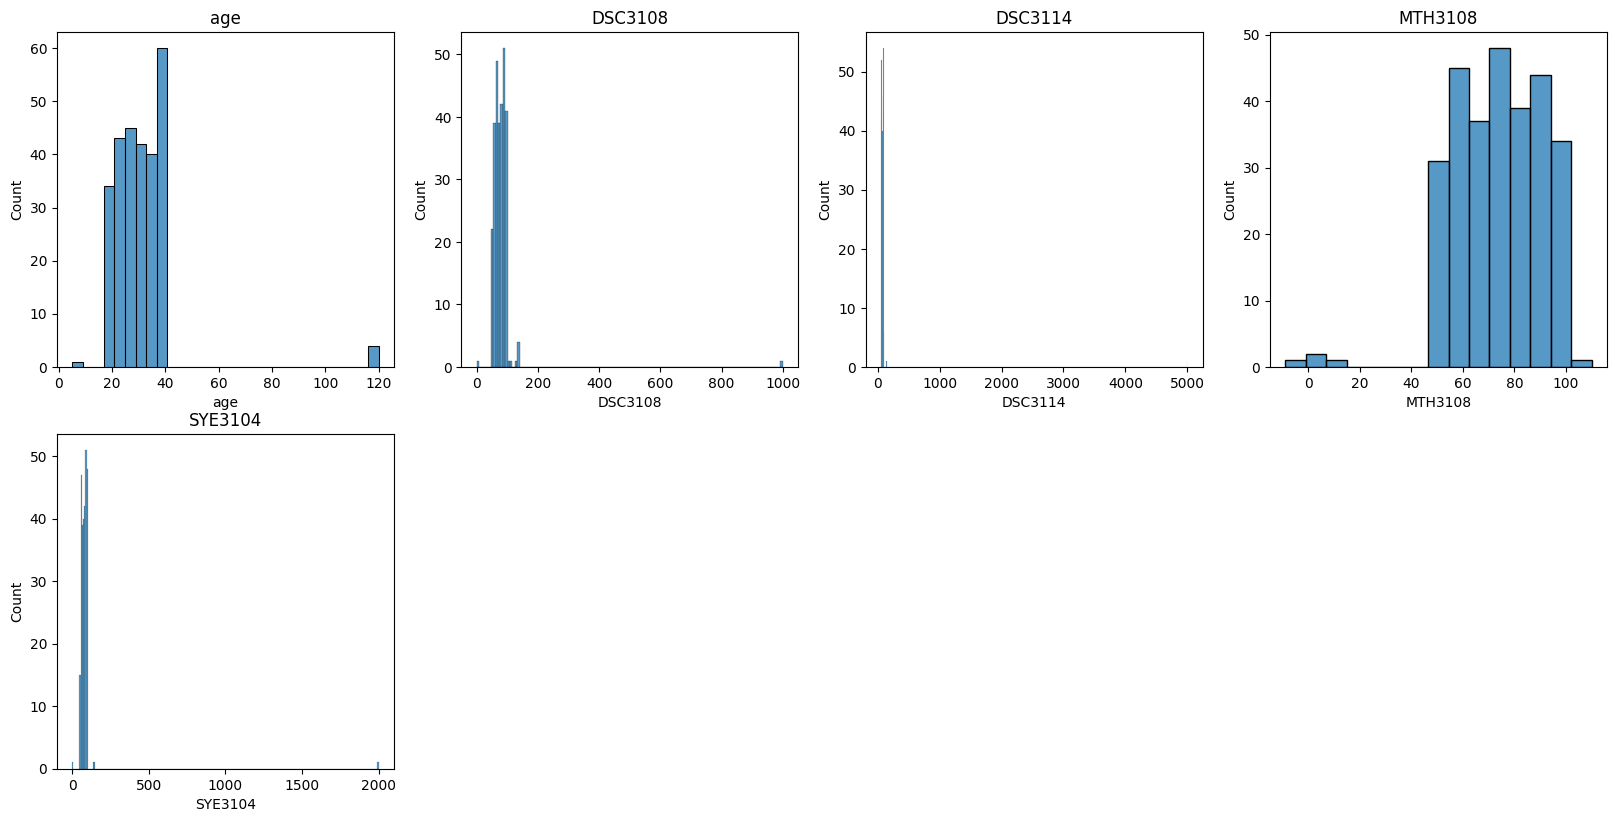

In [57]:
visual(num_data)

In [58]:
def remove_missing_values(data):
    for col in data.columns:
        data[col] = data[col].fillna(data[col].median())
    return data

In [59]:
num_data.isna().sum()

age        31
DSC3108     8
DSC3114    17
MTH3108    17
SYE3104    14
dtype: int64

In [60]:
remove_missing_values(num_data)

,age,DSC3108,DSC3114,MTH3108,SYE3104
0,21.0,1000.0,88.0,74.0,94.0
1,35.0,71.0,77.0,90.0,76.0
2,22.0,90.0,83.0,80.0,79.0
3,32.0,83.0,80.0,77.0,97.0
4,27.0,79.0,83.0,64.0,58.0
...,...,...,...,...,...
295,35.0,94.0,53.0,96.0,59.0
296,30.0,77.0,52.0,63.0,100.0
297,40.0,66.0,95.0,78.0,94.0
298,36.0,67.0,71.0,86.0,66.0


In [61]:
num_data.isna().sum()

age        0
DSC3108    0
DSC3114    0
MTH3108    0
SYE3104    0
dtype: int64

In [63]:
def visual2(data):
    plt.figure(figsize=(20,20))
    for i,col in enumerate(data.columns):
        plt.subplot(3,3,i+1)
        sns.boxplot(data[col])
        plt.title(col)
    return data
plt.tight_layout()
plt.show()
    

<Figure size 640x480 with 0 Axes>

,age,DSC3108,DSC3114,MTH3108,SYE3104
0,21.0,1000.0,88.0,74.0,94.0
1,35.0,71.0,77.0,90.0,76.0
2,22.0,90.0,83.0,80.0,79.0
3,32.0,83.0,80.0,77.0,97.0
4,27.0,79.0,83.0,64.0,58.0
...,...,...,...,...,...
295,35.0,94.0,53.0,96.0,59.0
296,30.0,77.0,52.0,63.0,100.0
297,40.0,66.0,95.0,78.0,94.0
298,36.0,67.0,71.0,86.0,66.0


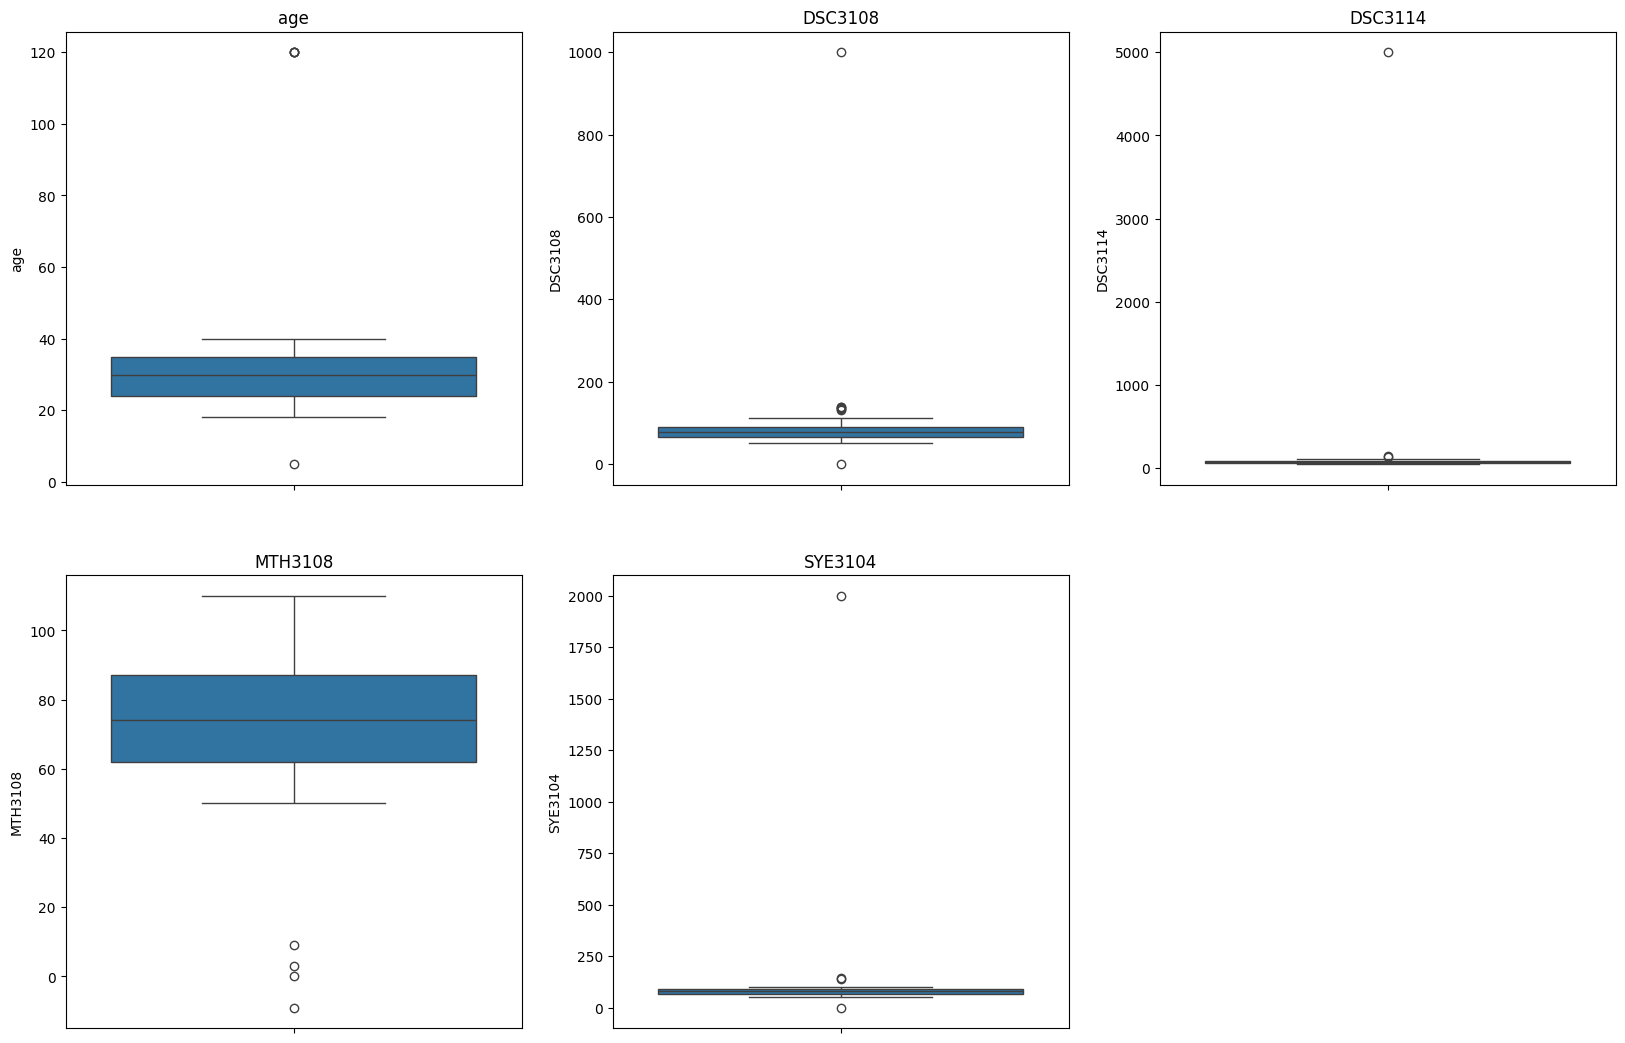

In [64]:
visual2(num_data)

In [65]:
def remove_outliers(data):
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 -q1
        lowerbound =  q1 - 1.5*iqr
        upperbound = q3 + 1.5*iqr

        data[col] = np.where(data[col]> upperbound,upperbound,data[col])
        data[col] = np.where(data[col] < lowerbound,lowerbound,data[col])    
    return data    

In [66]:
remove_outliers(num_data)

,age,DSC3108,DSC3114,MTH3108,SYE3104
0,21.0,125.0,88.0,74.0,94.0
1,35.0,71.0,77.0,90.0,76.0
2,22.0,90.0,83.0,80.0,79.0
3,32.0,83.0,80.0,77.0,97.0
4,27.0,79.0,83.0,64.0,58.0
...,...,...,...,...,...
295,35.0,94.0,53.0,96.0,59.0
296,30.0,77.0,52.0,63.0,100.0
297,40.0,66.0,95.0,78.0,94.0
298,36.0,67.0,71.0,86.0,66.0


,age,DSC3108,DSC3114,MTH3108,SYE3104
0,21.0,125.0,88.0,74.0,94.0
1,35.0,71.0,77.0,90.0,76.0
2,22.0,90.0,83.0,80.0,79.0
3,32.0,83.0,80.0,77.0,97.0
4,27.0,79.0,83.0,64.0,58.0
...,...,...,...,...,...
295,35.0,94.0,53.0,96.0,59.0
296,30.0,77.0,52.0,63.0,100.0
297,40.0,66.0,95.0,78.0,94.0
298,36.0,67.0,71.0,86.0,66.0


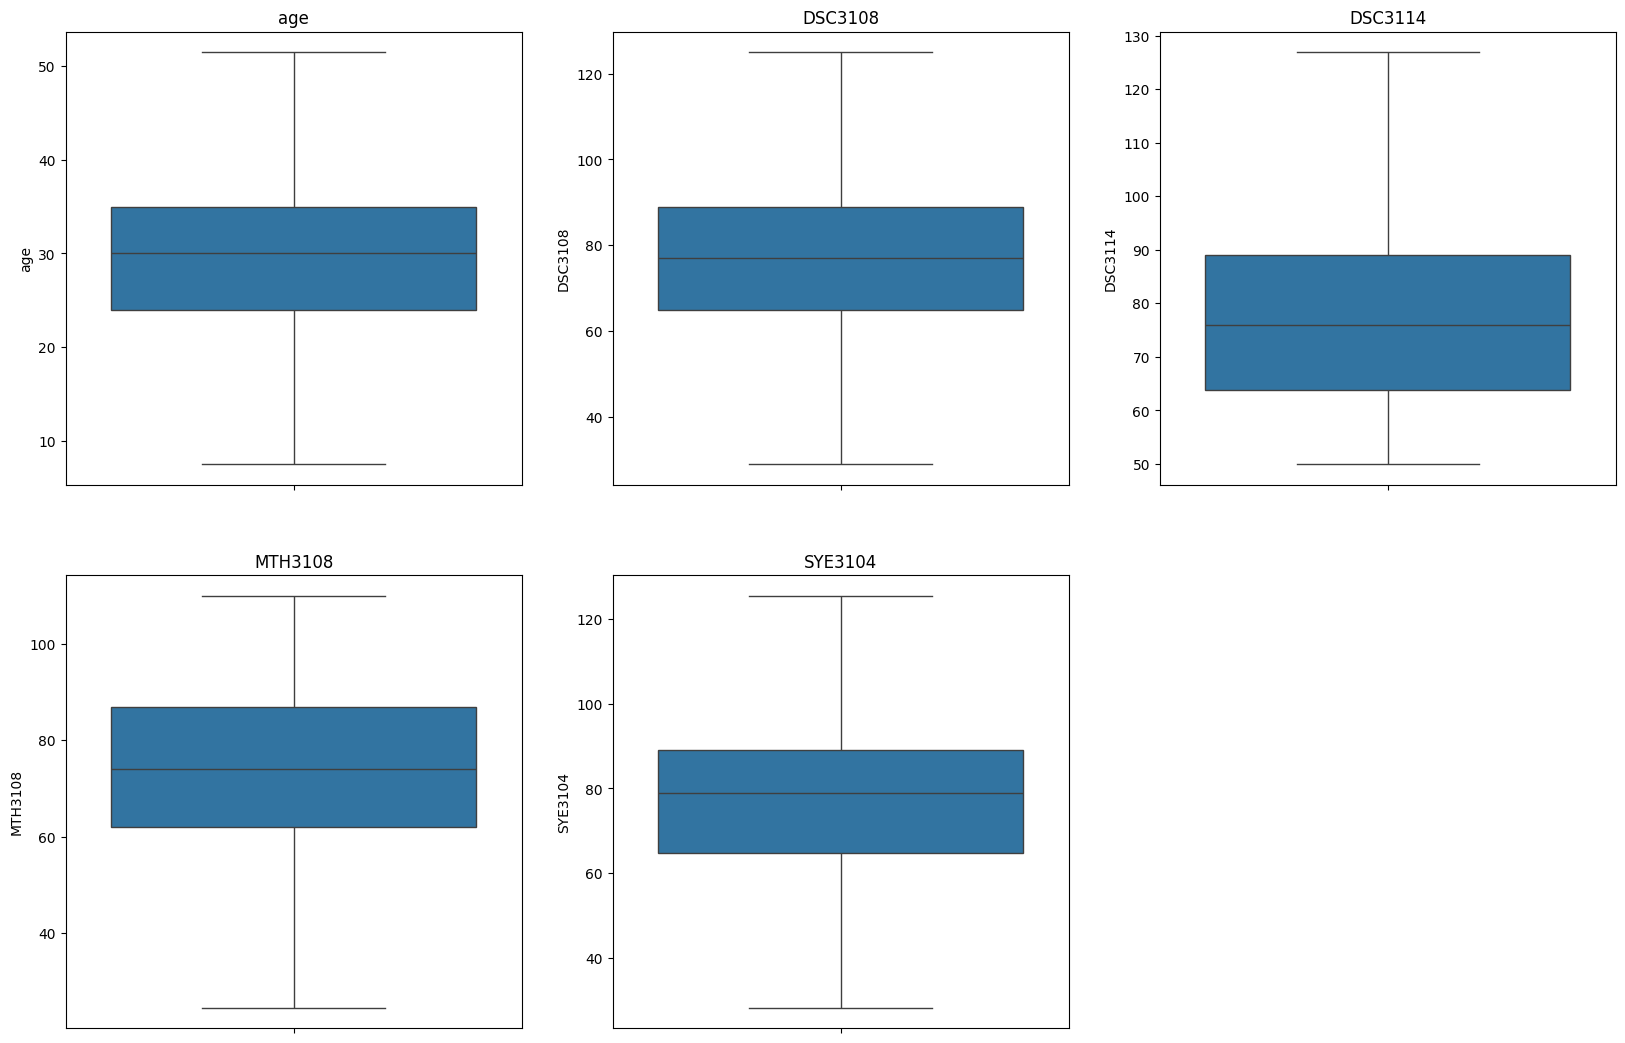

In [67]:
visual2(num_data)